In [1]:
from keras.layers import Dense, Input
from keras.losses import MeanSquaredError, BinaryCrossentropy
from keras.activations import relu, sigmoid
from keras import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
sns.set_style("darkgrid")
plt.rcParams["figure.dpi"] = 80

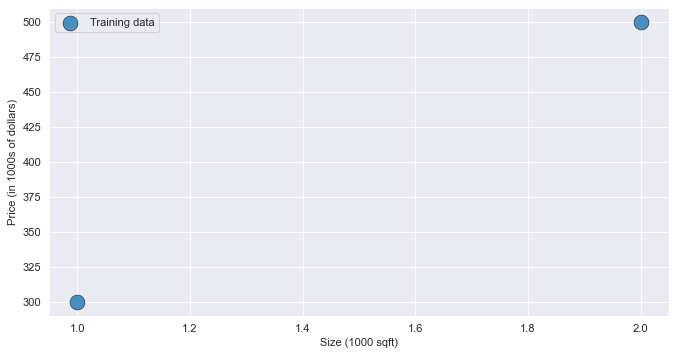

In [13]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
y_train = np.array([[300.0], [500.0]], dtype=np.float32)

plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=X_train[:, 0], 
    y=y_train[:, 0], 
    s=180,
    alpha=.8,
    edgecolor="black",
    linewidth=.5,
    label="Training data"
)

plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s of dollars)")
plt.legend()
plt.show()

## Regression / Linear Model

$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

In [15]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

In [18]:
a1 = linear_layer(X_train[0].reshape(1, 1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.7149645]], dtype=float32)>

In [19]:
w, b = linear_layer.get_weights()
print(f'w: {w}, b: {b}')

w: [[1.7149645]], b: [0.]


In [20]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [21]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(f'a1: {a1}')
alin = np.dot(set_w, X_train[0]) + set_b
print(f'alin: {alin}')

a1: [[300.]]
alin: [300.]


In [25]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

print(f'prediction_tf: {prediction_tf}')
print(f'prediction_np: {prediction_np}')

prediction_tf: [[300.]
 [500.]]
prediction_np: [[300.]
 [500.]]


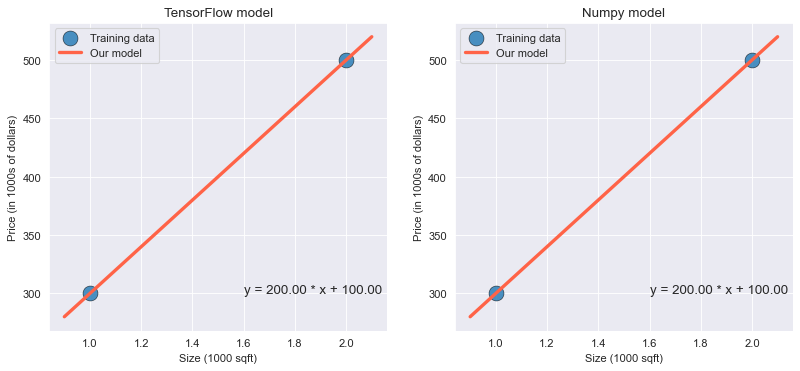

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

line = np.linspace(0.9, 2.1, 10).reshape(-1, 1)

sns.scatterplot(
    x=X_train[:, 0], 
    y=y_train[:, 0], 
    s=180,
    alpha=.8,
    edgecolor="black",
    linewidth=.5,
    label="Training data",
    ax=ax[0]
)

sns.lineplot(
    x=line[:, 0],
    y=linear_layer(line)[:, 0],
    color="tomato",
    linewidth=3,
    label="Our model",
    ax=ax[0]
)

formula = f'y = {set_w[0, 0]:.2f} * x + {set_b[0]:.2f}'
ax[0].text(1.6, 300, formula, fontsize=12)

ax[0].set_xlabel("Size (1000 sqft)")
ax[0].set_ylabel("Price (in 1000s of dollars)")
ax[0].set_title("TensorFlow model")

sns.scatterplot(
    x=X_train[:, 0], 
    y=y_train[:, 0], 
    s=180,
    alpha=.8,
    edgecolor="black",
    linewidth=.5,
    label="Training data",
    ax=ax[1]
)

#numpy prediction

sns.lineplot(
    x=line[:, 0],
    y=np.dot(line, set_w)[:, 0] + set_b,
    color="tomato",
    linewidth=3,
    label="Our model",
    ax=ax[1]
)

# draw formula
formula = f'y = {set_w[0, 0]:.2f} * x + {set_b[0]:.2f}'
ax[1].text(1.6, 300, formula, fontsize=12)

ax[1].set_xlabel("Size (1000 sqft)")
ax[1].set_ylabel("Price (in 1000s of dollars)")
ax[1].set_title("Numpy model")

plt.show()

## Neuron with Sigmoid Activation

In [37]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

X_train

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]], dtype=float32)

In [38]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

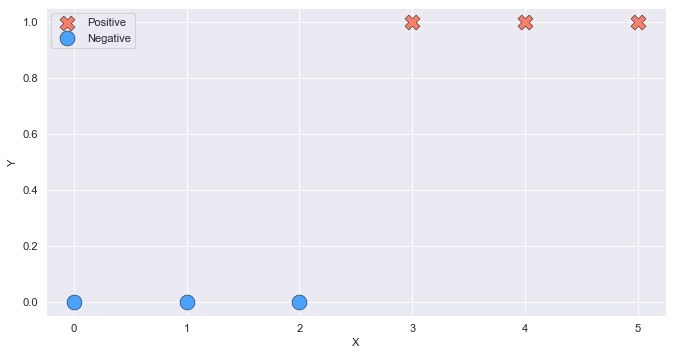

In [54]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=X_train[pos].reshape(-1), 
    y=Y_train[pos].reshape(-1), 
    s=180,
    alpha=.8,
    edgecolor="black",
    linewidth=.5,
    label="Positive",
    color="tomato",
    marker="X"
)

sns.scatterplot(
    x=X_train[neg].reshape(-1), 
    y=Y_train[neg].reshape(-1), 
    s=180,
    alpha=.8,
    edgecolor="black",
    linewidth=.5,
    label="Negative",
    color="dodgerblue",
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [56]:
model = Sequential([
    Input(shape=(1,)),
    Dense(1, activation=sigmoid, name='L1')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f'w: {w}, b: {b}')
print(f'w.shape: {w.shape}, b.shape: {b.shape}')

w: [[1.1883494]], b: [0.]
w.shape: (1, 1), b.shape: (1,)


In [58]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
logistic_layer.get_weights()

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

In [62]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(f'a1: {a1}')
alog = sigmoid(np.dot(set_w, X_train[0]) + set_b)
print(f'alog: {alog}')

1/1 [==============================] - 0s 69ms/step
a1: [[0.01098694]]
alog: [0.01098694]
